# Homework 6


This homework is designed to process a large csv file (bigger than pandas can handle)
https://github.com/msaricaumbc/DS_data/blob/master/bigfile.csv.zip?raw=true

Write code to perform/answer the following actions:

1. Print how many records processed
1. Create a histogram of ages
1. List the top 20 occupations 

Don't use Pandas or Dask

In [1]:
from zipfile import ZipFile

In [2]:
from urllib import request

def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())
        
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!')

In [3]:
file_url = 'https://github.com/msaricaumbc/DS_data/blob/master/bigfile.csv.zip?raw=true'
file_name = 'bigfile.csv.zip'

download_file(file_name, file_url)
unzip(file_name)

File Name                                             Modified             Size
bigfile.csv                                    2022-03-07 20:08:48  18034182194
Extracting all the files now...
Done!


In [4]:
#Read the file and seperate the age and occupation columns
with open('bigfile.csv', 'r') as file:
    counter = 0
    age = []
    occupation = []
    while(True):
        line = file.readline()
        if not line:
            break
        values = line.split(',')
        age.append(values[3])
        occupation.append(values[4])
        counter += 1

In [5]:
#Print how many records processed
print("The number of records processed are:", counter)

The number of records processed are: 600000


(array([1.57791e+05, 1.18469e+05, 1.31458e+05, 9.68830e+04, 6.01240e+04,
        2.44930e+04, 8.50300e+03, 1.87000e+03, 3.72000e+02, 3.70000e+01]),
 array([ 17. ,  33.5,  50. ,  66.5,  83. ,  99.5, 116. , 132.5, 149. ,
        165.5, 182. ]),
 <BarContainer object of 10 artists>)

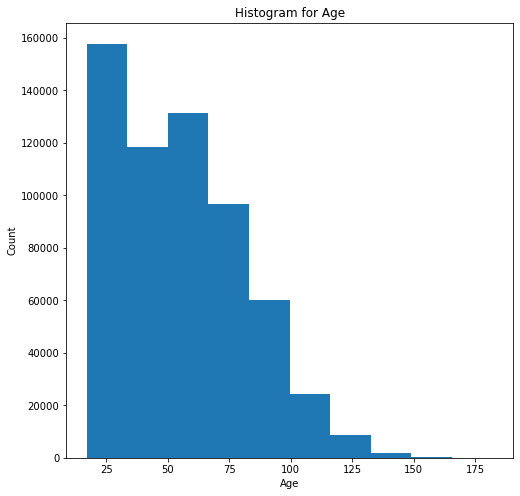

In [6]:
#Create a histogram of ages
from matplotlib import pyplot as plt

for i in range(0, len(age)):
    age[i] = int(age[i])
age.sort()

plt.figure(figsize=(8,8))
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.hist(age)

In [8]:
#List the top 20 occupations
import collections
occupation_group=collections.Counter(occupation)
print(occupation_group.most_common(20))

[('Scientist- product/process development', 1064), ('Psychiatric nurse', 1037), ('Therapist- sports', 1030), ('Toxicologist', 1024), ('Social researcher', 1021), ('Environmental health practitioner', 1020), ('Naval architect', 1019), ('Teacher- primary school', 1018), ('Administrator- charities/voluntary organisations', 1018), ('Chartered loss adjuster', 1012), ('Photographer', 1008), ('Field trials officer', 1008), ('Radio producer', 1006), ('Ranger/warden', 1004), ('Electrical engineer', 1004), ('Radiographer- diagnostic', 1004), ('Acupuncturist', 1003), ('Administrator- education', 1003), ('Quantity surveyor', 1002), ('Research scientist (medical)', 1001)]
